<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#deterministic" data-toc-modified-id="deterministic-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>deterministic</a></span><ul class="toc-item"><li><span><a href="#uniform-random-policy" data-toc-modified-id="uniform-random-policy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>uniform random policy</a></span></li><li><span><a href="#noisy-max-Q-policy" data-toc-modified-id="noisy-max-Q-policy-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>noisy max Q policy</a></span></li><li><span><a href="#epsilon-greedy-policy" data-toc-modified-id="epsilon-greedy-policy-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>epsilon greedy policy</a></span></li></ul></li><li><span><a href="#stochastic" data-toc-modified-id="stochastic-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>stochastic</a></span><ul class="toc-item"><li><span><a href="#analytical-success-rate" data-toc-modified-id="analytical-success-rate-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>analytical success rate</a></span></li><li><span><a href="#uniform-random-policy" data-toc-modified-id="uniform-random-policy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>uniform random policy</a></span></li><li><span><a href="#noisy-max-Q-policy" data-toc-modified-id="noisy-max-Q-policy-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>noisy max Q policy</a></span></li><li><span><a href="#epsilon-greedy-policy" data-toc-modified-id="epsilon-greedy-policy-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>epsilon greedy policy</a></span></li></ul></li></ul></div>

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def plotQ(Q):
    Q = Q.reshape(4, 4, 4)
    plt.figure(figsize=(5, 5))
    for row in range(4):
        for col in range(4):
            for ori in range(4):
                x = col + 0.5
                y = 4 - row - 0.5
                val = Q[row, col, ori]
                
                if ori == 0:
                    plt.fill_between(np.linspace(x, x-0.5, 2), 
                                     np.linspace(y, y+0.5, 2), 
                                     np.linspace(y, y-0.5, 2), 
                                     color=(val, val, val), alpha=0.8)
                if ori == 1:
                    plt.fill_between(np.linspace(x-0.5, x+0.5, 3), 
                                     [y-0.5, y, y-0.5], 
                                     np.linspace(y-0.5, y-0.5, 3), 
                                     color=(val, val, val), alpha=0.8)
                if ori == 2:
                    plt.fill_between(np.linspace(x, x+0.5, 2), 
                                     np.linspace(y, y+0.5, 2), 
                                     np.linspace(y, y-0.5, 2), 
                                     color=(val, val, val), alpha=0.8)
                if ori == 3:
                    plt.fill_between(np.linspace(x-0.5, x+0.5, 3),
                                     [y+0.5, y, y+0.5],
                                     np.linspace(y+0.5, y+0.5, 3), 
                                     color=(val, val, val), alpha=0.8)

    plt.xlim([0, 4])
    plt.ylim([0, 4])

def evalQ(Q, num_episodes=1000):
    totals = []
    for episode in range(num_episodes):
        episode_rewards = 0
        state = env.reset()
        while True:
            action = Q[state].argmax()
            state, reward, done, _ = env.step(action)
            episode_rewards += reward
            if done:
                break
        totals.append(episode_rewards)

    return sum(totals) / num_episodes

# deterministic

(state, action)을 알면 다음 state를 결정적으로 알 수 있습니다. `is_slippery=False` 옵션을 추가하면 됩니다.

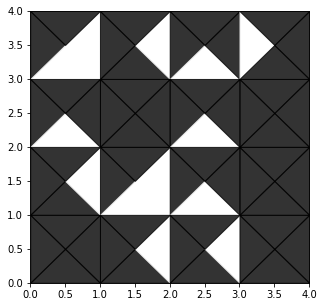

In [2]:
env = gym.make("FrozenLake-v0", is_slippery=False)
Q_ = np.array([[0., 1., 1., 0.],[0., 0., 1., 0.],[0., 1., 0., 0.],[1., 0., 0., 0.],
               [0., 1., 0., 0.],[0., 0., 0., 0.],[0., 1., 0., 0.],[0., 0., 0., 0.],
               [0., 0., 1., 0.],[0., 1., 1., 0.],[0., 1., 0., 0.],[0., 0., 0., 0.],
               [0., 0., 0., 0.],[0., 0., 1., 0.],[0., 0., 1., 0.],[0., 0., 0., 0.]])

# 대략 아래와 같은 그림이 나오도록 agent를 훈련시켜야 합니다.
plotQ(Q_)

In [3]:
# 평가 함수입니다.
evalQ(Q_)

1.0

## uniform random policy

무작위로 이동하는 agent입니다. 무작위로 이동해도 학습이 가능하나, 무작위 이동으로 도착 지점까지 도착할 수 있어야 합니다.

In [4]:
# 공통적으로 사용할 훈련함수
def train_deterministic_agent(policy, num_episodes=2000):
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    gamma = 0.90

    for episode in range(num_episodes):
        state = env.reset()
        while True:

            action = policy(Q, state, episode)
            state_new, reward, done, _ = env.step(action)
            Q[state, action] = reward + gamma*np.max(Q[state_new])
            state = state_new
            
            if done:
                break
            

    return Q

def random_policy(Q, state, episode):
    return np.random.randint(0, 4)
            
Q = train_deterministic_agent(random_policy)
evalQ(Q)

1.0

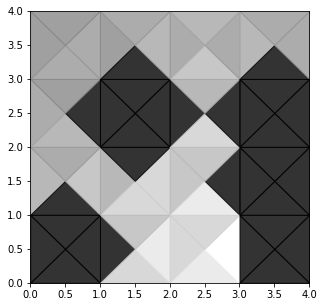

In [5]:
plotQ(Q)

In [6]:
# 과거 스탭을 저장해놓으면
# 적은 수의 반복만으로도 훈련 가능
Q = np.zeros([env.observation_space.n, env.action_space.n])
gamma = 0.90
num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()
    steps = []
    while True:

        action = random_policy(Q, state, episode)
        state_new, reward, done, _ = env.step(action)
        steps.append([state, action, state_new, reward])

        if done:
            if reward != 0:
                for state, action, state_new, reward in steps[::-1]:
                    Q[state, action] = reward + gamma*np.max(Q[state_new])
            break
        state = state_new        
        
evalQ(Q)

1.0

## noisy max Q policy

예측된 Q 가치를 최대로 만드는 action을 선택하되, 예측된 Q 가치에 noise를 더합니다.

In [9]:
def noisy_policy(Q, state, episode):
    return np.argmax(Q[state] + np.random.randn(env.action_space.n) / (episode+1))

Q = train_deterministic_agent(noisy_policy)    
evalQ(Q)

1.0

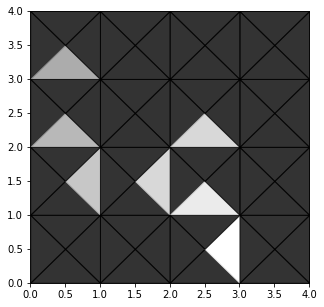

In [10]:
# 다니던 경로에 의존하게 되는 경향으로 차선의 경로를 학습할 수 있다.
plotQ(Q)

## epsilon greedy policy

`epsilon`의 값은 epoch에 따라 선형적으로 감소하도록 만들었습니다.

In [13]:
def epsilon_greedy_policy(Q, state, episode):
    epsilon = max(1 - episode / 500, 0.01)
    if np.random.rand() < epsilon:
        return env.action_space.sample()  
    else:
        return np.argmax(Q[state])

Q = train_deterministic_agent(epsilon_greedy_policy)
evalQ(Q)

1.0

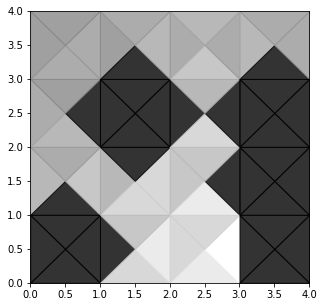

In [14]:
# 모든 위치에서의 Q 가치를 고루 학습하는 경향
plotQ(Q)

# stochastic

agent 미끄러운 빙판 때문에 이동하려는 방향으로 반드시 가지는 못합니다. 아래로 이동하고자 하면, 아래로 이동될 확률 33.3%, 오른쪽 33.3%, 왼쪽 33.3%의 확률로 이동합니다.

In [15]:
import gym
import numpy as np

env = gym.make("FrozenLake-v0")

# 정답 Q table
Q_ = np.array([[1., 0., 0., 0.],[0., 0., 0., 1.],[1., 0., 0., 0.],[0., 0., 0., 0.],
               [1., 0., 0., 0.],[0., 0., 0., 0.],[1., 0., 0., 0.],[0., 0., 0., 0.],
               [0., 0., 0., 1.],[0., 1., 0., 0.],[1., 0., 0., 0.],[0., 0., 0., 0.],
               [0., 0., 0., 0.],[0., 0., 1., 0.],[0., 1., 0., 0.],[0., 0., 0., 0.]])

# 못해도 점수가 0.7은 넘겨야 함
for _ in range(10):
    score = evalQ(Q_)
    print(score)

0.706
0.73
0.725
0.747
0.731
0.707
0.725
0.714
0.743
0.743


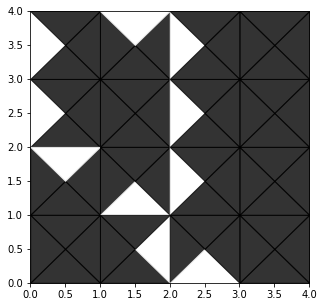

In [16]:
# 정답 Q 테이블이 결정적일 때와 다릅니다.
plotQ(Q_)

## analytical success rate

In [17]:
# 위 전략(Q_)으로 플레이했을 시 각 위치에서의 성공 확률을 해석적으로 구했다.
Q_transition = np.zeros((10, 10))
Q_transition[0, 3] = 1
Q_transition[1, [0, 2]] = 0.5
Q_transition[2, [1, 4]] = 1/2
Q_transition[3, [0, 5]] = 0.5
Q_transition[4, [2, 7]] = 1/3
Q_transition[5, [3, 6]] = 0.5
Q_transition[6, [5, 7, 8]] = 1/3
Q_transition[7, [6, 9, 4]] = 1/3
Q_transition[8, [6, 9]] = 0.5
Q_transition[9, 8] = 0.5

M = Q_transition - np.eye(10)
b = np.zeros((10,))
b[9] = -0.5
t = np.linalg.inv(M) @ b

# (1, 1)에서 시작할 경우 성공 확률은 0.78이다.
# 다만 최대 이동 가능 횟수에 제한이 있기 때문에
# 실험에서는 최적의 경로로 이동해도 성공확률아 0.74 정도이다.
t

array([0.7804878 , 0.65853659, 0.53658537, 0.7804878 , 0.41463415,
       0.7804878 , 0.7804878 , 0.70731707, 0.85365854, 0.92682927])

In [26]:
# 이동제한 없이 평가 함수 새롭게 정의할 경우,
# 성공률이 올라간다.
# 주의: 이동제한이 없는 경우 (1, 3)에서 왼쪽으로 가는 것이 최적의 전략이다.
# (1, 3)에서 아래로 가는 것의 장점은 골 지점에 빠르게 갈 수 있다는 것이다.
def evalQ_timeunlimited(Q, num_episodes=1000):
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        while True:
            action = Q[state].argmax()
            state, reward, done, info = env.step(action)
            
            if done:
                if 'TimeLimit.truncated' in info and info['TimeLimit.truncated']:
                    num_episodes -= 1
                rewards.append(reward)
                break

    return sum(rewards) / num_episodes

evalQ_timeunlimited(Q_, 10000)

0.7866323907455013

## uniform random policy

In [27]:
# 기존의 방식대로 업데이트를 하면
# Q value를 update하는 과정에서 망각 문제 발생!! -> 점진적으로 학습한다.

Q = train_deterministic_agent(random_policy)
evalQ_timeunlimited(Q)

0.047

In [28]:
class Trainer():
    def __init__(self):
        self.episodes = 0
        self.Q = np.zeros([env.observation_space.n, env.action_space.n])
        
    def train_stochastic_agent(self, policy, num_episodes=2000, learning_rate=0.15):
        Q = self.Q
        gamma = 0.99
        num_episodes = 2000

        for episode in range(num_episodes):
            self.episodes += 1
            state = env.reset()
            while True:
                action = policy(Q, state, self.episodes)
                state_new, reward, done, _ = env.step(action)

                # 점진적으로 학습을 수행한다.
                Q[state, action] = (1-learning_rate)*Q[state, action] + \
                                    learning_rate*(reward+gamma*np.max(Q[state_new]))
                state = state_new

                if done:
                    break

# 망각이 서서히 일어나도록 learning_rate을 낮게 설정
# 성능이 좋아졌지만 망각의 문제는 여전히 있다.
# 랜덤하게 움직이다가 잘못된 방향으로 움직이면 망각이 발생한다.
# 반복 횟수를 늘려도 소용 없다.
trainer = Trainer()
for i in range(10):
    trainer.train_stochastic_agent(random_policy) 
    print("반복 %d:"%(i+1), evalQ(trainer.Q))

반복 1: 0.33
반복 2: 0.636
반복 3: 0.759
반복 4: 0.604
반복 5: 0.579
반복 6: 0.742
반복 7: 0.738
반복 8: 0.743
반복 9: 0.623
반복 10: 0.654


## noisy max Q policy

In [31]:
# 이 방법은 한 번 굳어진 경로로만 계속 이동하게 되기 때문에 망각이 발생하기 어렵다.
# 그러나 이 경우 만약 잘못 학습될 경우, 기존 학습한 경로에 자꾸 의존하게 된다.
# 탐험률을 높이면 망각이 다시 실현된다.

# learning_rate를 낮추면 랜덤하게 새로운 곳을 탐험해도 그곳의 지식을 새롭게 배우지 못한다.
# 그래서 기존 경로에 의존하는 경향이 더 심해진다.
trainer = Trainer()
for i in range(10):
    trainer.train_stochastic_agent(noisy_policy, learning_rate=0.85) 
    print("반복 %d:"%(i+1), evalQ(trainer.Q)) # 여러 번 실행해보면 최고점을 찍기도, 중간 성적을 보이기도 한다.

반복 1: 0.641
반복 2: 0.727
반복 3: 0.723
반복 4: 0.735
반복 5: 0.741
반복 6: 0.75
반복 7: 0.737
반복 8: 0.742
반복 9: 0.759
반복 10: 0.752


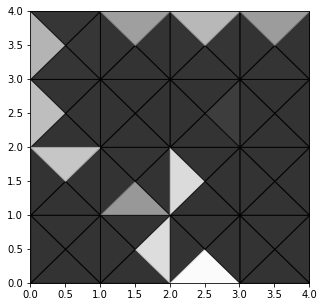

In [32]:
plotQ(trainer.Q)

## epsilon greedy policy

In [33]:
# epsilon greedy는 기존 경로로 이동하게 만들어서, 잘못된 학습이 일어나지 않도록 만든다.
# 한편 잘못된 학습을 갱신하기 위해 탐색을 지속한다.
# 이 경우에도 망각의 문제는 여전히 남아있다.
trainer = Trainer()
for i in range(10):
    trainer.train_stochastic_agent(epsilon_greedy_policy, learning_rate=0.15) 
    print("반복 %d:"%(i+1), evalQ(trainer.Q))

반복 1: 0.731
반복 2: 0.71
반복 3: 0.722
반복 4: 0.739
반복 5: 0.719
반복 6: 0.714
반복 7: 0.751
반복 8: 0.73
반복 9: 0.711
반복 10: 0.717


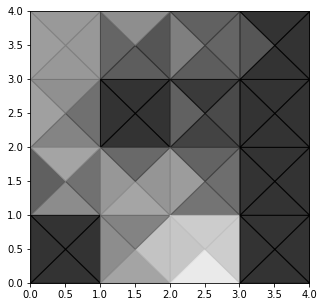

In [34]:
plotQ(trainer.Q)